In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [12]:
#load a dataset
(X_train, y_train), (X_test,y_test) = tf.keras.datasets.cifar10.load_data() # Call the load_data function
X_train.shape

(50000, 32, 32, 3)

In [13]:
X_test.shape

(10000, 32, 32, 3)

to verify how it looks .plot the first 25 images  from training dataset and display.



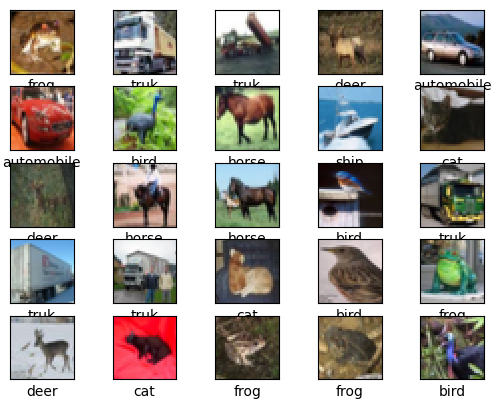

In [17]:
class_name=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship', 'truk']
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train[i])
  #cifar-10 labels happen to be array,
  #which is why i need to give extra index
  plt.xlabel(class_name[y_train[i][0]])
plt.show()

In [18]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

it is in 2d so convert into 1d


In [19]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [21]:
y_test = y_test.reshape(-1,)
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

#normalize the dataset

In [22]:
X_train = X_train / 255.0
X_test = X_test / 255.0

Build ANN model


In [24]:
from tensorflow import keras
from tensorflow.keras import layers, models

ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 138s 88ms/step - accuracy: 0.3061 - loss: 1.9269
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 138s 88ms/step - accuracy: 0.4171 - loss: 1.6446
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 162s 104ms/step - accuracy: 0.4530 - loss: 1.5510
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 190s 96ms/step - accuracy: 0.4752 - loss: 1.4915
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 203s 97ms/step - accuracy: 0.4913 - loss: 1.4394


In [25]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.68      0.40      0.50      1000
           1       0.73      0.41      0.52      1000
           2       0.36      0.31      0.34      1000
           3       0.46      0.12      0.20      1000
           4       0.28      0.65      0.40      1000
           5       0.44      0.36      0.39      1000
           6       0.50      0.52      0.51      1000
           7       0.59      0.47      0.53      1000
           8       0.55      0.68      0.61      1000
           9       0.45      0.69      0.55      1000

    accuracy                           0.46     10000
   macro avg       0.50      0.46      0.45     10000
weighted avg       0.50      0.46      0.45     10000



# BY using CNN model

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix

cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [28]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 46ms/step - accuracy: 0.3854 - loss: 1.6900
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 43ms/step - accuracy: 0.5976 - loss: 1.1511
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 42ms/step - accuracy: 0.6547 - loss: 0.9983
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.6824 - loss: 0.9090
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 44ms/step - accuracy: 0.7136 - loss: 0.8305
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 42ms/step - accuracy: 0.7338 - loss: 0.7717
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 41ms/step - accuracy: 0.7437 - loss: 0.7354
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 42ms/step - accuracy: 0.7652 - loss: 0.6768
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 42ms/step - accuracy: 0.7798 - loss: 0.6354
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 41ms/step - accuracy: 0.7892 - loss: 0.6067


In [30]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.7018 - loss: 0.9103


[0.9104380011558533, 0.6987000107765198]

In [31]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step


array([[1.21132158e-04, 3.86614647e-06, 4.64214216e-04, 5.91755748e-01,
        2.58203538e-04, 3.88395756e-01, 1.88031960e-02, 1.01204016e-04,
        8.81157684e-05, 8.50730339e-06],
       [1.14324677e-03, 8.85581672e-01, 5.02413968e-05, 2.80150374e-07,
        8.21750064e-07, 7.54984484e-08, 1.47972671e-07, 2.65369579e-07,
        1.12409152e-01, 8.14096595e-04],
       [1.34111583e-01, 2.76176464e-02, 1.68431376e-03, 1.99764525e-03,
        3.75614967e-04, 4.08036227e-04, 1.24579979e-04, 1.03678775e-03,
        8.29281151e-01, 3.36268591e-03],
       [9.60823894e-01, 1.35489227e-03, 5.77494130e-03, 3.34134093e-05,
        1.66929290e-02, 3.97018521e-05, 8.39219501e-05, 2.29892321e-04,
        1.45080481e-02, 4.58354538e-04],
       [1.49952172e-07, 5.37430515e-06, 3.72723937e-02, 1.91334225e-02,
        8.77220854e-02, 8.59534252e-04, 8.54998112e-01, 2.39499059e-07,
        8.17396540e-06, 4.53014593e-07]], dtype=float32)

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.7018 - loss: 0.9103
Test Loss: 0.9104380011558533
Test Accuracy: 0.6987000107765198
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.69      0.75      0.72      1000
           1       0.84      0.80      0.82      1000
           2       0.58      0.63      0.61      1000
           3       0.58      0.39      0.47      1000
           4       0.64      0.60      0.62      1000
           5       0.54      0.73      0.62      1000
           6       0.75      0.82      0.78      1000
           7       0.78      0.69      0.74      1000
           8       0.85      0.75      0.80      1000
           9       0.77      0.81      0.79      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000



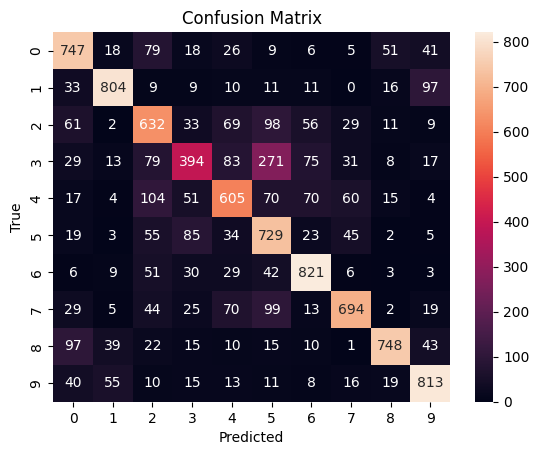

In [37]:
import matplotlib.pyplot as plt
import numpy as np
# Assuming you have your test data in X_test and y_test

# Evaluate the model using the test data
loss, accuracy = cnn.evaluate(X_test, y_test)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# You can also make predictions on the test data and compare them to the actual labels
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

# Print a classification report to get precision, recall, F1-score, etc.
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

# You can also plot a confusion matrix to visualize the model's performance
cm = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


#test dataset
